In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
29203,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


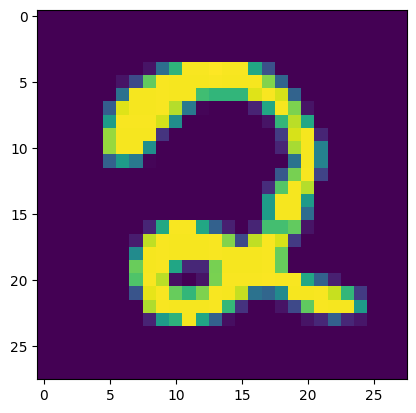

In [6]:
plt.imshow(df.iloc[97,1:].values.reshape(28,28))

WITHOUT USING PCA

In [7]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]#column 1 contains label which is output

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [9]:
X_train.shape

(33600, 784)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier()

In [12]:
df.isnull().mean()

,0
label,0.0
pixel0,0.0
pixel1,0.0
pixel2,0.0
pixel3,0.0
...,...
pixel779,0.0
pixel780,0.0
pixel781,0.0
pixel782,0.0


In [13]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [14]:
import time
start = time.time()
Y_pred = knn.predict(X_test)
print(time.time() - start)#we have included time just to see how long knntakes

24.490012168884277


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.9648809523809524

USING PCA

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

using same no of components

In [18]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)#none will create same no of components as in data like 784 here

In [19]:
X__train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)
#in this step --find eigen values and eigen vectors and then shift it to new coordinate axis

In [20]:
X_train.shape

(33600, 784)

using 100 components

In [21]:
pca = PCA(n_components=100)

In [22]:
X_train_trf2= pca.fit_transform(X_train)
X_test_trf2 = pca.transform(X_test)

In [23]:
X_train_trf2.shape

(33600, 100)

In [24]:
KNN = KNeighborsClassifier()

In [25]:
KNN.fit(X_train_trf2,Y_train)

KNeighborsClassifier()

In [26]:
Y_pred = KNN.predict(X_test_trf2)

In [27]:
accuracy_score(Y_test,Y_pred)

0.9533333333333334

using 200 components

In [28]:
pca = PCA(n_components=200)

In [29]:
X_train_trf3= pca.fit_transform(X_train)
X_test_trf3 = pca.transform(X_test)

In [30]:
X_train_trf3.shape

(33600, 200)

In [31]:
knn = KNeighborsClassifier()

In [32]:
knn.fit(X_train_trf3,Y_train)

KNeighborsClassifier()

In [33]:
Y_pred = knn.predict(X_test_trf3)

In [34]:
accuracy_score(Y_pred,Y_test)

0.950595238095238

checking for all values

In [ ]:
for i in range(1,785):
  pca = PCA(n_components=i)
  X_train_trf = pca.fit_transform(X_train)
  X_test_trf = pca.transform(X_test)

  knn = KNeighborsClassifier()
  knn.fit(X_train_trf,Y_train)
  Y_pred = knn.predict(X_test_trf)
  print(accuracy_score(Y_pred,Y_test))

0.25785714285714284
0.32357142857142857
0.5104761904761905
0.6664285714285715
0.7376190476190476
0.8227380952380953
0.843452380952381
0.8725
0.8863095238095238
0.9047619047619048
0.9111904761904762
0.9182142857142858
0.9286904761904762
0.9347619047619048
0.9391666666666667
0.9379761904761905
0.9398809523809524
0.9403571428571429
0.9425
0.9435714285714286
0.9429761904761905
0.9445238095238095
0.945
0.945952380952381
0.9477380952380953
0.9477380952380953
0.9470238095238095
0.9485714285714286
0.9484523809523809
0.9508333333333333
0.9508333333333333
0.950595238095238
0.9508333333333333
0.9501190476190476
0.9503571428571429
0.9525
0.9527380952380953
0.9525
0.9528571428571428
0.9521428571428572
0.9530952380952381
0.9527380952380953
0.9525
0.9533333333333334
0.9542857142857143
0.9525
0.9535714285714286
0.9542857142857143
0.9534523809523809
0.9529761904761904
0.9534523809523809
0.9532142857142857
0.9546428571428571
0.9544047619047619
0.9542857142857143
0.9534523809523809
0.9548809523809524
0.9

VISUALISATION OF DATA

In [35]:
#transforming to a 2D coordinate system
pca = PCA(n_components = 2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [36]:
X_train_trf

array([[-2.71866765, -0.48972033],
       [-0.67708583, -6.75248082],
       [-3.03328819,  6.51032286],
       ...,
       [ 2.14870021,  0.7823207 ],
       [ 1.05949082,  0.94830882],
       [17.70248911,  1.96356023]])

In [39]:
import plotly.express as px#hover using plotly
Y_train_trf = Y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=Y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10#predefined color sequences in Plotly, providing 10 different colors.
                 )

fig.show()

In [40]:
#transforming to a 3D coordinate system
pca = PCA(n_components = 3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [41]:
X_train_trf

array([[-2.71857466, -0.48972275,  1.1338891 ],
       [-0.67703443, -6.75377582, -2.33505616],
       [-3.03317702,  6.5099702 ,  7.49031775],
       ...,
       [ 2.14880198,  0.7807008 , -0.74595277],
       [ 1.05967637,  0.94791457,  3.94724194],
       [17.70262895,  1.96199814, -4.94442009]])

In [42]:
Y_train_trf = Y_train.astype(str)
fig = px.scatter_3d(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 z=X_train_trf[:,2],
                 color=Y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                 )

fig.show()

In [45]:
pca.explained_variance_
#eigen value

array([40.67111197, 29.17023398, 26.74458953])

In [47]:
pca.components_
#eigen vectors

array([[-4.31348962e-18,  3.93060541e-20, -5.88367956e-20, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 7.11661529e-17, -7.61345629e-19,  1.22228030e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.12880753e-16, -4.31829701e-18, -7.77510142e-19, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [48]:
pca.components_.shape


(3, 784)

Finding optimum no of Principal Components

In [50]:
#finding % of variance of 3D
pca.explained_variance_ratio_#12%

array([0.05785192, 0.0414927 , 0.03804238])

In [52]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [53]:
pca.explained_variance_.shape

(784,)

In [54]:
pca.components_.shape

(784, 784)

In [55]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [56]:
#applying cumulative sum
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

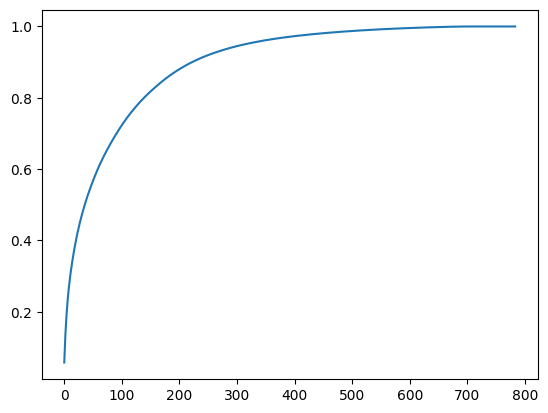

In [57]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))